In [1]:
#Importing the packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [2]:
import pandas_profiling as pf

In [3]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.dtype, x.nunique(), x.count(), x.isnull().sum(), x.sum(), x.mean(),
                      x.median(), x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
            index = ['DataType', 'C', 'N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 
                           'P1', 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [4]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.nunique(), x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['C', 'N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [5]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [6]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [7]:
cars=pd.read_csv("Car_sales.csv")

In [8]:
cars.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
Manufacturer              157 non-null object
Model                     157 non-null object
Sales_in_thousands        157 non-null float64
four_year_resale_value    121 non-null float64
Vehicle_type              157 non-null object
Price_in_thousands        155 non-null float64
Engine_size               156 non-null float64
Horsepower                156 non-null float64
Wheelbase                 156 non-null float64
Width                     156 non-null float64
Length                    156 non-null float64
Curb_weight               155 non-null float64
Fuel_capacity             156 non-null float64
Fuel_efficiency           154 non-null float64
Latest_Launch             157 non-null object
Power_perf_factor         155 non-null float64
dtypes: float64(12), object(4)
memory usage: 19.7+ KB


In [10]:
cars.Manufacturer.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti',
       'Jaguar', 'Jeep', 'Lexus', 'Lincoln', 'Mitsubishi', 'Mercury',
       'Mercedes-B', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac',
       'Porsche', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [11]:
report=pf.ProfileReport(cars)

In [12]:
report.to_file("CarSales_profilereport.html")

In [13]:
cars_conti_vars = cars.loc[:, (cars.dtypes == 'float64') | (cars.dtypes == 'int64')]
cars_cat_vars = cars.loc[:, (cars.dtypes == 'object')]


In [14]:
cars_conti_vars.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

In [15]:
cars_cat_vars.columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Latest_Launch'], dtype='object')

In [16]:
cars_conti_vars.apply(continuous_var_summary).round(1).T
# alternate of .describe() for continuous variables

,DataType,C,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,float64,157,157,0,8320.7,52.9981,29.45,68.0294,4628,0.11,0.93728,1.8708,5.4536,14.114,29.45,67.956,127.642,185.336,260.645,540.561
four_year_resale_value,float64,117,121,36,2186.83,18.073,14.18,11.4534,131.18,5.16,6.173,7.85,9.125,11.26,14.18,19.875,32.075,41.25,60.22,67.55
Price_in_thousands,float64,152,155,2,4245.57,27.3908,22.799,14.3517,205.97,9.235,10.2314,12.469,13.9708,18.0175,22.799,31.9475,44.017,55.835,78.4798,85.5
Engine_size,float64,31,156,1,477.5,3.0609,3,1.04465,1.0913,1,1.555,1.8,1.95,2.3,3,3.575,4.6,4.775,5.7,8
Horsepower,float64,66,156,1,29008,185.949,177.5,56.7003,3214.93,55,96.4,114.5,120,149.5,177.5,215,254,300,325.75,450
Wheelbase,float64,88,156,1,16768,107.487,107,7.6413,58.3895,92.6,92.875,95.875,98.65,103,107,112.2,115.5,119.25,134.375,138.7
Width,float64,78,156,1,11099.4,71.15,70.55,3.45187,11.9154,62.6,66.085,66.5,66.9,68.4,70.55,73.425,76.2,78.2,79.19,79.9
Length,float64,127,156,1,29225.6,187.344,187.9,13.4318,180.412,149.4,154.915,163.675,173,177.575,187.9,196.125,203.4,208.5,219.305,224.5
Curb_weight,float64,147,155,2,523.594,3.37803,3.342,0.630502,0.397532,1.895,2.2454,2.4235,2.6062,2.971,3.342,3.7995,4.1186,4.3891,5.39668,5.572
Fuel_capacity,float64,55,156,1,2800.5,17.9519,17.2,3.88792,15.1159,10.3,11.9,12.5,13.2,15.8,17.2,19.575,23.2,25.4,30.9,32


In [17]:
cars_cat_vars.apply(categorical_var_summary).T
# alternate of .describe() for categorical variables

,C,N,NMISS,MODE,FREQ,PERCENT
Manufacturer,30,157,0,Ford,11,7.01
Model,156,157,0,Neon,2,1.27
Vehicle_type,2,157,0,Passenger,116,73.89
Latest_Launch,130,157,0,9/25/2011,2,1.27


In [18]:
#Outlier treatment
cars_conti_vars = cars_conti_vars.apply(lambda x: x.clip(lower = x.quantile(0.01), 
                                                         upper = x.quantile(0.99)))

In [19]:
cars_conti_vars.apply(continuous_var_summary).round(1).T

,DataType,C,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Sales_in_thousands,float64,155,157,0,8025.53,51.118,29.45,57.7227,3331.91,0.93728,0.946643,1.8708,5.4536,14.114,29.45,67.956,127.642,185.336,253.561,260.645
four_year_resale_value,float64,115,121,36,2180.42,18.02,14.18,11.1813,125.022,6.173,6.4234,7.85,9.125,11.26,14.18,19.875,32.075,41.25,59.896,60.22
Price_in_thousands,float64,150,155,2,4235.96,27.3287,22.799,14.064,197.795,10.2314,10.4764,12.469,13.9708,18.0175,22.799,31.9475,44.017,55.835,76.5845,78.4798
Engine_size,float64,29,156,1,475.81,3.05006,3,0.982279,0.964871,1.555,1.57975,1.8,1.95,2.3,3,3.575,4.6,4.775,5.7,5.7
Horsepower,float64,64,156,1,28910.3,185.322,177.5,52.8165,2789.58,96.4,98.38,114.5,120,149.5,177.5,215,254,300,317.087,325.75
Wheelbase,float64,87,156,1,16760.1,107.437,107,7.4243,55.1202,92.875,92.9988,95.875,98.65,103,107,112.2,115.5,119.25,132.519,134.375
Width,float64,76,156,1,11102.5,71.1696,70.55,3.39034,11.4944,66.085,66.2583,66.5,66.9,68.4,70.55,73.425,76.2,78.2,79.1405,79.19
Length,float64,125,156,1,29223.9,187.333,187.9,13.1204,172.144,154.915,156.227,163.675,173,177.575,187.9,196.125,203.4,208.5,217.102,219.305
Curb_weight,float64,145,155,2,523.77,3.37916,3.342,0.621764,0.386591,2.2454,2.24788,2.4235,2.6062,2.971,3.342,3.7995,4.1186,4.3891,5.39469,5.39668
Fuel_capacity,float64,54,156,1,2799.9,17.9481,17.2,3.81985,14.5913,11.9,11.9,12.5,13.2,15.8,17.2,19.575,23.2,25.4,30.405,30.9


In [20]:
# missing value treatment
cars_conti_vars = cars_conti_vars.apply(missing_imputation)
cars_cat_vars = cars_cat_vars.apply(missing_imputation)

In [21]:
# scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

#Ordered categories: transform them to sensible numeric values (example: small=1, medium=2, large=3)
#Unordered categories: use dummy encoding (0/1)

In [22]:
def countcharts(x):
    sns.countplot(x)
    plt.show()

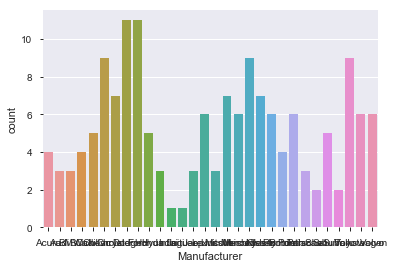

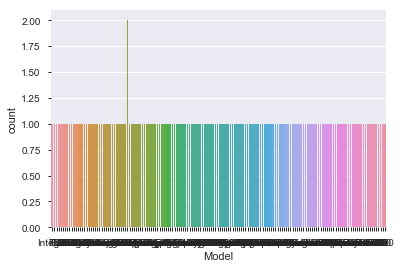

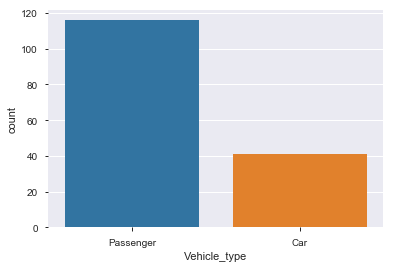

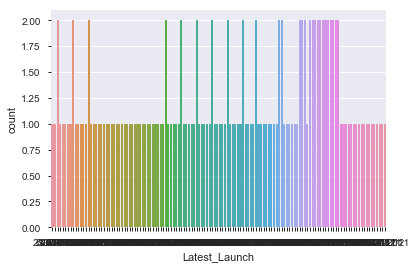

Manufacturer     None
Model            None
Vehicle_type     None
Latest_Launch    None
dtype: object

In [23]:
%matplotlib inline
cars_cat_vars.apply(countcharts)

In [24]:
cars_cat_vars=cars[['Manufacturer','Vehicle_type']]
for c_features in ['Manufacturer','Vehicle_type']:
    cars_cat_vars[c_features]= cars_cat_vars[c_features].astype('category')
    cars_cat_vars=create_dummies(cars_cat_vars,c_features)

In [25]:
cars_cat_vars.shape

(157, 30)

In [26]:
cars_cat_vars

,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Buick,Manufacturer_Cadillac,Manufacturer_Chevrolet,Manufacturer_Chrysler,Manufacturer_Dodge,Manufacturer_Ford,Manufacturer_Honda,Manufacturer_Hyundai,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
cars_new=pd.concat([cars_conti_vars,cars_cat_vars],axis=1)

In [28]:
cars_new.shape

(157, 42)

In [29]:
cars_new.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Plymouth,Manufacturer_Pontiac,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger
0,16.919,16.360,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,...,0,0,0,0,0,0,0,0,0,1
1,39.384,19.875,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,...,0,0,0,0,0,0,0,0,0,1
2,14.114,18.225,27.328745,3.2,225.0,106.9,70.6,192.0,3.470,17.2,...,0,0,0,0,0,0,0,0,0,1
3,8.588,29.725,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,...,0,0,0,0,0,0,0,0,0,1
4,20.397,22.255,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,...,0,0,0,0,0,0,0,0,0,1


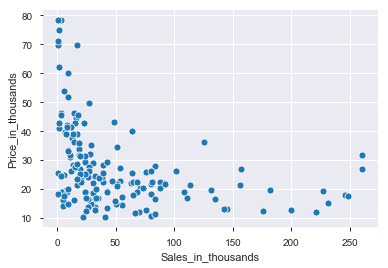

In [30]:
sns.scatterplot( cars_new.Sales_in_thousands, cars_new.Price_in_thousands)

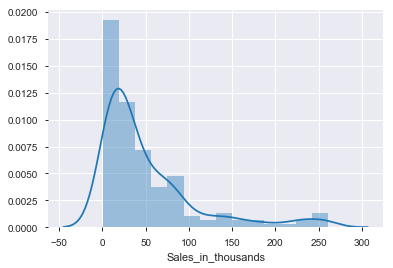

In [31]:
sns.distplot(cars_new.Sales_in_thousands)
plt.show()

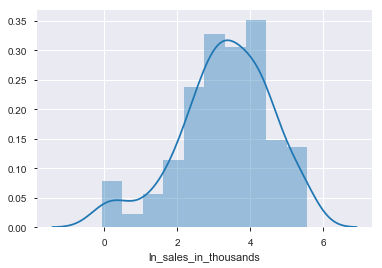

In [32]:
cars_new['ln_sales_in_thousands'] = np.log(cars_new['Sales_in_thousands'])
sns.distplot(cars_new['ln_sales_in_thousands'])
plt.show()
# Note: good practice is to take the log of the data plus 1, bcoz we don't have log of zero defined
# In thios data its not required as sales are always greater than zero
# apply log transformation: log is rescalling the data and making the distribution normal

In [33]:
cars_new.Sales_in_thousands.skew()

1.99249329205088

In [34]:
cars_new.ln_sales_in_thousands.skew()

-0.5925861100519004

In [36]:
# Linearity: correlation matrix (ranges from 1 to -1)
corrm = cars_new.corr()
corrm.to_excel('CarsSales_corrm.xlsx')

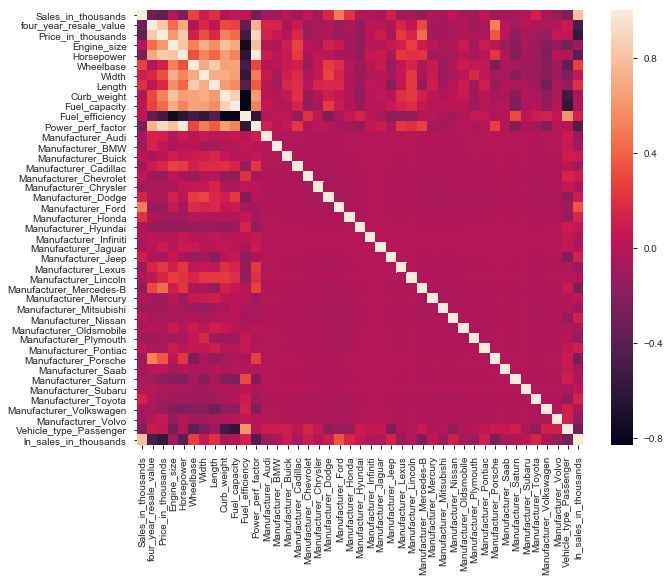

In [37]:
plt.figure(figsize = (10, 8))
sns.heatmap(cars_new.corr())

In [38]:
cars_new.columns

Index(['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands',
       'Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor',
       'Manufacturer_Audi', 'Manufacturer_BMW', 'Manufacturer_Buick',
       'Manufacturer_Cadillac', 'Manufacturer_Chevrolet',
       'Manufacturer_Chrysler', 'Manufacturer_Dodge', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_Infiniti',
       'Manufacturer_Jaguar', 'Manufacturer_Jeep', 'Manufacturer_Lexus',
       'Manufacturer_Lincoln', 'Manufacturer_Mercedes-B',
       'Manufacturer_Mercury', 'Manufacturer_Mitsubishi',
       'Manufacturer_Nissan', 'Manufacturer_Oldsmobile',
       'Manufacturer_Plymouth', 'Manufacturer_Pontiac', 'Manufacturer_Porsche',
       'Manufacturer_Saab', 'Manufacturer_Saturn', 'Manufacturer_Subaru',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo',
       'Vehicle_

In [39]:
cars_new.rename(columns={'Manufacturer_Mercedes-B':'Manufacturer_Mercedes_B'},inplace=True)

In [40]:
# Remove the multi colinear variables - VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [41]:
Features=cars_new.columns.difference(['Sales_in_thousands'])

In [42]:
model_param='ln_sales_in_thousands~'+'+'.join(Features)

In [43]:
model_param

'ln_sales_in_thousands~Curb_weight+Engine_size+Fuel_capacity+Fuel_efficiency+Horsepower+Length+Manufacturer_Audi+Manufacturer_BMW+Manufacturer_Buick+Manufacturer_Cadillac+Manufacturer_Chevrolet+Manufacturer_Chrysler+Manufacturer_Dodge+Manufacturer_Ford+Manufacturer_Honda+Manufacturer_Hyundai+Manufacturer_Infiniti+Manufacturer_Jaguar+Manufacturer_Jeep+Manufacturer_Lexus+Manufacturer_Lincoln+Manufacturer_Mercedes_B+Manufacturer_Mercury+Manufacturer_Mitsubishi+Manufacturer_Nissan+Manufacturer_Oldsmobile+Manufacturer_Plymouth+Manufacturer_Pontiac+Manufacturer_Porsche+Manufacturer_Saab+Manufacturer_Saturn+Manufacturer_Subaru+Manufacturer_Toyota+Manufacturer_Volkswagen+Manufacturer_Volvo+Power_perf_factor+Price_in_thousands+Vehicle_type_Passenger+Wheelbase+Width+four_year_resale_value+ln_sales_in_thousands'

In [44]:
X_var=list(cars_new.columns)
X_var.remove('Sales_in_thousands')
X_var.remove('Power_perf_factor')
X_var.remove('Price_in_thousands')
X_var.remove('Engine_size')
X_var.remove('Curb_weight')

In [45]:
model_param='ln_sales_in_thousands~'+'+'.join(X_var)

In [46]:
# High VIF of the variable means information in that variable has already been explained by 
# other X variables present in the model

y,X=dmatrices(model_param,cars_new,return_type='dataframe')

In [47]:
# For each X, calculate VIF and save in dataframe
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF Factor']= [variance_inflation_factor(X.values,i ) for i in range (X.shape[1])]

In [48]:
vif.sort_values(by='VIF Factor',ascending=False)

,Features,VIF Factor
0,Intercept,2101.119328
5,Length,9.492550
3,Wheelbase,8.890446
7,Fuel_efficiency,7.169293
6,Fuel_capacity,6.434638
2,Horsepower,5.681870
37,Vehicle_type_Passenger,4.911397
4,Width,4.257297
15,Manufacturer_Ford,4.156482
14,Manufacturer_Dodge,4.130240


In [49]:
from sklearn.feature_selection import f_regression
features=cars_new[X_var]
target=cars_new['ln_sales_in_thousands']
F_values,p_values=f_regression(features,target)

In [50]:
F_regression_results=pd.concat([pd.Series(features.columns),pd.Series(F_values).round(5),pd.Series(p_values).round(5)],axis=1)

In [51]:
F_regression_results.columns=['Features','F_value','p_value']

In [52]:
F_regression_results.sort_values(by='p_value',inplace=True)
F_regression_results.to_csv("f_reg.csv")
# or-- F_regression_results.sort_values(by='F_value',ascending=False)

In [53]:
F_regression_results

,Features,F_value,p_value
0,four_year_resale_value,4.624018e+01,0.00000
1,Horsepower,2.961674e+01,0.00000
14,Manufacturer_Ford,2.106145e+01,0.00001
36,Vehicle_type_Passenger,1.246216e+01,0.00055
2,Wheelbase,1.220782e+01,0.00062
29,Manufacturer_Porsche,1.065318e+01,0.00135
22,Manufacturer_Mercedes_B,9.878570e+00,0.00200
4,Length,6.954750e+00,0.00921
35,Manufacturer_Volvo,3.934500e+00,0.04907
15,Manufacturer_Honda,3.852350e+00,0.05147


In [54]:
Features = list(F_regression_results.loc[ F_regression_results.p_value <= 0.1, 'Features' ])

In [55]:
Features 

['four_year_resale_value',
 'Horsepower',
 'Manufacturer_Ford',
 'Vehicle_type_Passenger',
 'Wheelbase',
 'Manufacturer_Porsche',
 'Manufacturer_Mercedes_B',
 'Length',
 'Manufacturer_Volvo',
 'Manufacturer_Honda',
 'Manufacturer_Toyota',
 'Manufacturer_Plymouth',
 'Fuel_efficiency',
 'Manufacturer_Audi']

In [56]:
#Modelling
from sklearn.model_selection import train_test_split
train,test=train_test_split(cars_new,test_size=0.3,random_state=1)

In [57]:
print("No of observations in training",len(train),"|","No of observations in test",len(test))

No of observations in training 109 | No of observations in test 48


In [58]:
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error
formula_mo="ln_sales_in_thousands~"+"+".join(Features)
lmo=smf.ols(formula_mo,train).fit()

In [59]:
print(lmo.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_sales_in_thousands   R-squared:                       0.520
Model:                               OLS   Adj. R-squared:                  0.449
Method:                    Least Squares   F-statistic:                     7.285
Date:                   Sun, 05 Jul 2020   Prob (F-statistic):           5.15e-10
Time:                           14:48:25   Log-Likelihood:                -138.18
No. Observations:                    109   AIC:                             306.4
Df Residuals:                         94   BIC:                             346.7
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [60]:
lmo.predict(train)

135    3.322558
77     3.271683
18     3.256617
48     4.753184
4      2.109999
45     4.275923
102    3.289788
39     0.099340
36     3.193366
120    2.926821
145    3.168082
110    3.466355
12     3.409534
11     3.183935
85     3.452893
126    0.623797
97     2.072824
116    3.052098
2      3.232124
107    3.627091
6      1.227472
0      3.296189
113    4.292786
65     3.155862
55     5.891642
81     3.382139
84     3.063318
46     4.972678
62     3.751886
74     3.012003
         ...   
88     3.539140
8      2.690221
60     3.414077
128    2.775702
1      3.140255
57     4.374301
22     3.847980
61     4.393211
63     3.459580
7      3.294724
153    2.303952
86     3.895842
96     1.968371
68     3.089753
50     4.837949
142    4.084205
139    4.170219
101    3.745009
20     3.481226
25     3.881248
134    3.069733
71     2.612725
129    4.185048
144    2.965137
79     3.690082
133    3.582401
137    4.087293
72     2.749239
140    4.265274
37     3.451432
Length: 109, dtype: floa

In [61]:
train.loc[:,'pred_sales']=np.exp(lmo.predict(train))
train.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
135,33.028,18.020008,20.095,2.5,165.0,99.4,68.3,175.2,3.12500,15.9,...,0,0,0,1,0,0,0,0,3.497356,27.731185
77,48.911,21.725000,43.330,4.6,215.0,117.7,78.2,215.3,4.12100,19.0,...,0,0,0,0,0,0,0,1,3.890002,26.355671
18,14.785,18.020008,46.225,5.7,255.0,117.5,77.0,201.2,5.39668,30.0,...,0,0,0,0,0,0,0,0,2.693613,25.961552
48,35.068,8.835000,17.035,2.5,170.0,106.5,69.1,184.6,2.76900,15.0,...,0,0,0,0,0,0,0,1,3.557289,115.952842
4,20.397,22.255000,23.990,1.8,150.0,102.6,68.2,178.0,2.99800,16.4,...,0,0,0,0,0,0,0,1,3.015388,8.248233


In [62]:
test.loc[:,'pred_sales']=np.exp(lmo.predict(test))
test.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,...,Manufacturer_Porsche,Manufacturer_Saab,Manufacturer_Saturn,Manufacturer_Subaru,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo,Vehicle_type_Passenger,ln_sales_in_thousands,pred_sales
117,1.872,18.020008,43.000,3.5,253.0,113.3,76.3,165.4,2.850,12.0,...,0,0,0,0,0,0,0,1,0.627007,5.254536
75,51.238,18.020008,34.605,3.0,220.0,103.0,71.5,180.1,3.900,17.2,...,0,0,0,0,0,0,0,0,3.936481,22.570229
51,63.403,14.210000,22.195,4.6,200.0,114.7,78.2,212.0,3.908,19.0,...,0,0,0,0,0,0,0,1,4.149511,103.548915
31,32.306,12.640000,16.480,2.0,132.0,108.0,71.0,186.0,2.911,16.0,...,0,0,0,0,0,0,0,1,3.475253,41.718876
35,76.034,7.750000,12.640,2.0,132.0,105.0,74.4,174.4,2.567,12.5,...,0,0,0,0,0,0,0,1,4.331181,49.174505


In [63]:
MAE_train=mean_absolute_error(train.Sales_in_thousands,train.pred_sales)
MAE_test=mean_absolute_error(test.Sales_in_thousands,test.pred_sales)

In [64]:
print("MAE of training data",MAE_train,"|","MAE of testing data",MAE_test)

MAE of training data 28.219177905897695 | MAE of testing data 31.94149498956716


In [65]:
MAPE_train=np.mean(np.abs(train['Sales_in_thousands']-train['pred_sales'])/train['Sales_in_thousands'])
MAPE_test=np.mean(np.abs(test['Sales_in_thousands']-test['pred_sales'])/test['Sales_in_thousands'])

In [66]:
print("MAPE of training data",MAPE_train,"|","MAPE of testing data",MAPE_test)

MAPE of training data 1.0798756410004315 | MAPE of testing data 0.9735977846541264


In [67]:
MSE_train = mean_squared_error(train.Sales_in_thousands, train.pred_sales)
MSE_test = mean_squared_error(test.Sales_in_thousands, test.pred_sales)

print('MSE of training data: ', MSE_train,  ' | ', 'MSE of testing data: ', MSE_test)
print('RMSE of training data: ', np.sqrt(MSE_train),  ' | ', 'RMSE of testing data: ', np.sqrt(MSE_test))

MSE of training data:  2024.060787463016  |  MSE of testing data:  2616.3822432003867
RMSE of training data:  44.989563094822515  |  RMSE of testing data:  51.15058399666994


In [68]:
# Corelation between actual and predicted
Corr_train = stats.pearsonr(train.Sales_in_thousands, train.pred_sales)
Corr_test = stats.pearsonr(test.Sales_in_thousands, test.pred_sales)

print('Corr of training data: ', Corr_train,  ' | ', 'Corr of testing data: ', Corr_test)

Corr of training data:  (0.6314578053113569, 1.819475054359854e-13)  |  Corr of testing data:  (0.6691692126234331, 1.9978629818753226e-07)


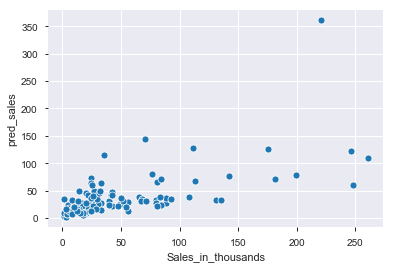

In [69]:
sns.scatterplot(train.Sales_in_thousands,train.pred_sales)

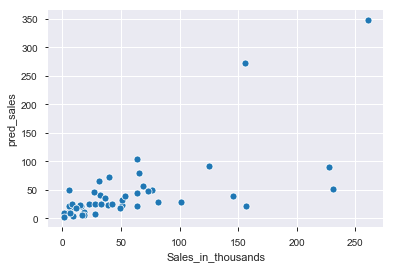

In [70]:
sns.scatterplot(test.Sales_in_thousands,test.pred_sales)

In [71]:
# accuracy metrics (Decile Analysis: for validation of models - Business validation)

# create the 10 groups in the data
train.loc[:, 'Deciles'] = pd.qcut( train['pred_sales'], 10, labels = False )
test.loc[:, 'Deciles'] = pd.qcut( test['pred_sales'], 10, labels = False )

# Decile Analysis for train data
Predicted_avg_train = train.groupby('Deciles')[['Sales_in_thousands', 'pred_sales']].mean().reset_index().sort_index(ascending = False)
Predicted_avg_test = test.groupby('Deciles')[['Sales_in_thousands', 'pred_sales']].mean().reset_index().sort_index(ascending = False)

Predicted_avg_train.to_csv('Decile_analysis_train.csv')
Predicted_avg_test.to_csv('Decile_analysis_test.csv')

In [72]:
Predicted_avg_train

,Deciles,Sales_in_thousands,pred_sales
9,9,141.999847,128.947420
8,8,78.538091,61.109095
7,7,51.847273,41.449710
6,6,64.728273,33.946830
5,5,45.499300,29.855403
4,4,27.942455,25.327021
3,3,36.464818,21.889068
2,2,16.683818,17.694999
1,1,19.892000,12.845929
0,0,5.757960,5.626766


In [73]:
Predicted_avg_test

,Deciles,Sales_in_thousands,pred_sales
9,9,166.446864,181.226659
8,8,87.008400,65.060985
7,7,49.123400,46.858930
6,6,66.812500,38.564221
5,5,57.859800,28.498484
4,4,26.256200,24.122752
3,3,57.335250,22.092101
2,2,28.020800,18.543822
1,1,14.056000,8.864320
0,0,9.537600,4.561009


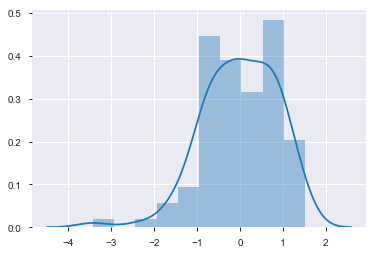

In [74]:
# assumption: Normality of the residuals/error (using distplot)
sns.distplot(lmo.resid)
plt.show()

In [75]:
# assumption: mean of residuals/errors is zero
print(lmo.resid.mean())

6.526277988975439e-14


In [76]:
# assumption: residuals/errors of the model should not be correlated with dependant (Y) variable
print(stats.stats.pearsonr(lmo.resid, train.ln_sales_in_thousands))

(0.6925324687425848, 7.33771912219607e-17)


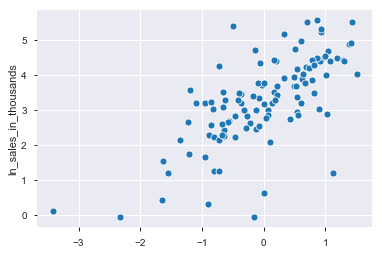

In [77]:
# assumption: homoscedasticity of residuals/errors
sns.scatterplot(lmo.resid, train.ln_sales_in_thousands)
plt.show()